In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mnist_fashion = keras.datasets.fashion_mnist

In [ ]:
 (x_train,y_train),(x_test,y_test) = mnist_fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names =['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
#Data exploration

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

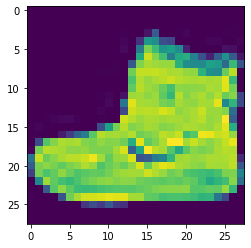

In [ ]:
plt.figure()
plt.imshow(x_train[0])

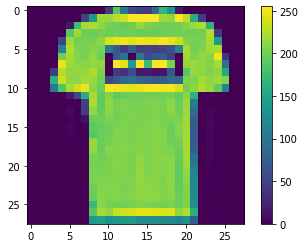

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
# Normalization of data
# In between 0 and 1
x_train,x_test = x_train/255,x_test/255

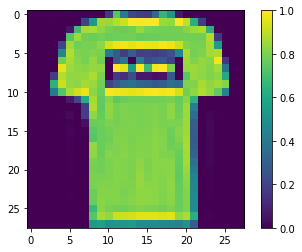

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
np.max(x_train)

1.0

In [ ]:
# Building machine learning model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model compilation

In [ ]:
# loss function
# optimizer
# metrics

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Training model
model.fit(x_train,y_train,epochs =20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4973 - accuracy: 0.8246
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8639
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.8843
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8905
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8965
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9007
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9038
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [ ]:
# Evaluating model
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8884


In [ ]:
# Checking accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
y_predict = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
accuracy_score(y_test,y_predict)

0.8884

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([[4.4512896e-10, 1.4575117e-11, 8.8876135e-15, ..., 7.4766329e-05,
        6.8377672e-11, 9.9990129e-01],
       [3.0450458e-06, 1.2244830e-15, 9.9957305e-01, ..., 1.6217124e-15,
        1.2907411e-12, 1.1704894e-14],
       [4.6173284e-14, 1.0000000e+00, 9.1276557e-20, ..., 0.0000000e+00,
        2.0233942e-16, 5.7405655e-32],
       ...,
       [2.0571017e-07, 1.0387448e-15, 1.8675498e-08, ..., 1.2799622e-13,
        9.9999952e-01, 8.1814555e-17],
       [3.2088338e-10, 1.0000000e+00, 5.8921484e-15, ..., 1.6994689e-22,
        1.9924977e-10, 8.6014265e-15],
       [3.2466502e-08, 2.8619157e-11, 4.6310868e-11, ..., 1.5282392e-04,
        4.9255964e-06, 1.9196575e-07]], dtype=float32)

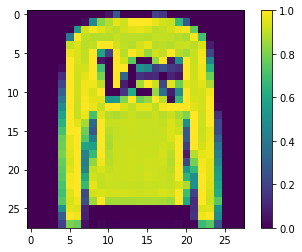

In [ ]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()

In [ ]:
# Checking x_test[1] prediction by model
# It's prediction will be y_predict[1]
# Returns as pullover

np.argmax(y_predict[1])

2

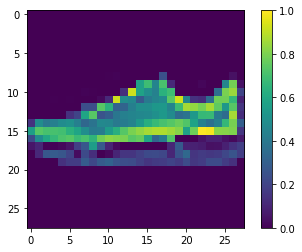

In [ ]:
plt.figure()
plt.imshow(x_test[9])
plt.colorbar()

In [ ]:
np.argmax(y_predict[9])

7

In [ ]:
# Plotting Loss and Accuracy

In [ ]:
history = model.fit(x_train,y_train,epochs =10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5179 - accuracy: 0.8200 - val_loss: 0.4415 - val_accuracy: 0.8432
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8598 - val_loss: 0.3938 - val_accuracy: 0.8619
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.8701
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8822 - val_loss: 0.3493 - val_accuracy: 0.8715
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.8868 - val_loss: 0.3358 - val_accuracy: 0.8808
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2898 - accuracy: 0.8930 - val_loss: 0.3346 - val_accuracy: 0.8802
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.8978 - val_loss: 0.3228 - val_accuracy:

In [ ]:
history.history

{'accuracy': [0.820020854473114,
  0.8597916960716248,
  0.8712083101272583,
  0.8822083473205566,
  0.8867708444595337,
  0.8929583430290222,
  0.8978124856948853,
  0.9013124704360962,
  0.9056249856948853,
  0.9091041684150696],
 'loss': [0.5179374814033508,
  0.389390230178833,
  0.35091662406921387,
  0.32483524084091187,
  0.3057993948459625,
  0.2898470163345337,
  0.27548637986183167,
  0.2660615146160126,
  0.25446009635925293,
  0.2439524382352829],
 'val_accuracy': [0.8431666493415833,
  0.8619166612625122,
  0.8700833320617676,
  0.8715000152587891,
  0.8807500004768372,
  0.8801666498184204,
  0.8848333358764648,
  0.8849166631698608,
  0.8878333568572998,
  0.8853333592414856],
 'val_loss': [0.4415138363838196,
  0.39382901787757874,
  0.3646722435951233,
  0.3493240475654602,
  0.33577847480773926,
  0.3346393406391144,
  0.3227764666080475,
  0.3142016530036926,
  0.3201642334461212,
  0.3286333978176117]}

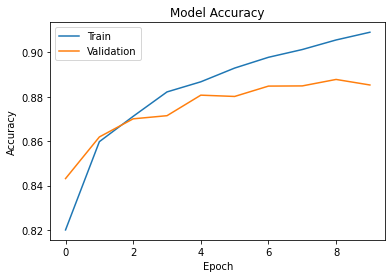

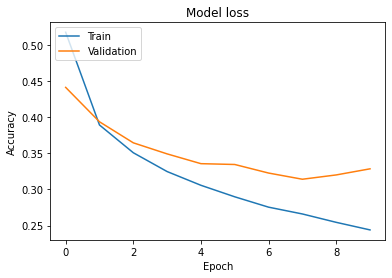

In [ ]:
# Plotting training  accuracy and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

# Plotting  training loss and validation loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc="upper left")
plt.show()

In [ ]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
y_pred=[]
for x in y_predict:
  y_pred.append(np.argmax(x))


In [ ]:
y_pred

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 6,
 1,
 2,
 5,
 1,
 2,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 4,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 4,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 6,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 6,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 6,
 4,


In [ ]:
confusion_sc = confusion_matrix(y_test,y_pred)
confusion_sc

array([[833,   0,  16,  18,   8,   1, 116,   0,   8,   0],
       [  2, 979,   0,  10,   5,   0,   3,   0,   1,   0],
       [ 14,   1, 759,   4, 150,   2,  68,   0,   2,   0],
       [ 21,  14,  21, 847,  52,   0,  37,   0,   8,   0],
       [  0,   2,  55,   9, 893,   0,  38,   0,   3,   0],
       [  0,   0,   0,   1,   0, 965,   0,  18,   1,  15],
       [ 94,   1,  68,  20,  96,   0, 710,   0,  11,   0],
       [  0,   0,   0,   0,   0,  10,   0, 950,   0,  40],
       [  4,   0,   4,   3,   4,   3,   3,   2, 977,   0],
       [  0,   0,   0,   0,   0,   6,   1,  22,   0, 971]])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
plot_confusion_matrix(model,y_test,y_pred)

ValueError: ignored

In [ ]:
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

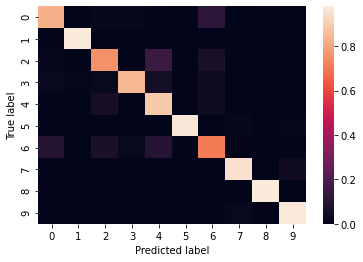

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

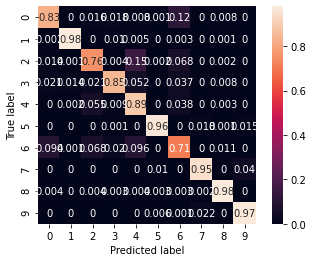

In [ ]:
sns.heatmap(conf_mat_normalized,annot=True,square= True)
plt.ylabel('True label')
plt.xlabel('Predicted label')